<a href="https://colab.research.google.com/github/nadireus/Machine-Learning/blob/main/used_car_price_prediction_with_Lineer_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
df_original=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_dataset.csv") 

In [15]:
df=df_original

# Data Preparation

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [ ]:
df.shape

(301, 9)

In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.describe(include= 'O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
#select numeric columns
df_numeric = df.select_dtypes(include=[np.number]) #select numeric columns
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['Year' 'Selling_Price' 'Present_Price' 'Kms_Driven' 'Owner']


In [ ]:
#select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number]) 
non_numeric_cols = df_non_numeric.columns.values 
print(non_numeric_cols)

['Car_Name' 'Fuel_Type' 'Seller_Type' 'Transmission']


###The chart below demonstrates the missing data patterns of the first 30 features.**

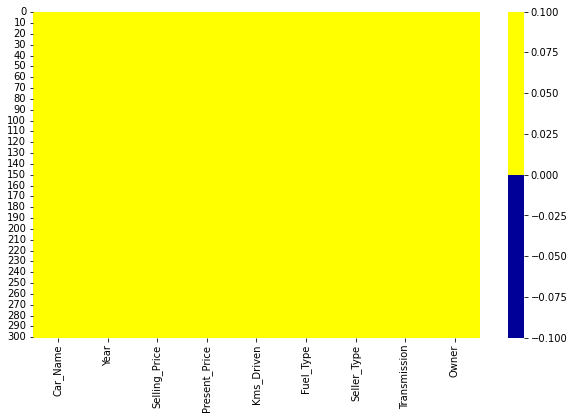

In [ ]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

##Missing Data Percentage List

In [ ]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Car_Name - 0%
Year - 0%
Selling_Price - 0%
Present_Price - 0%
Kms_Driven - 0%
Fuel_Type - 0%
Seller_Type - 0%
Transmission - 0%
Owner - 0%


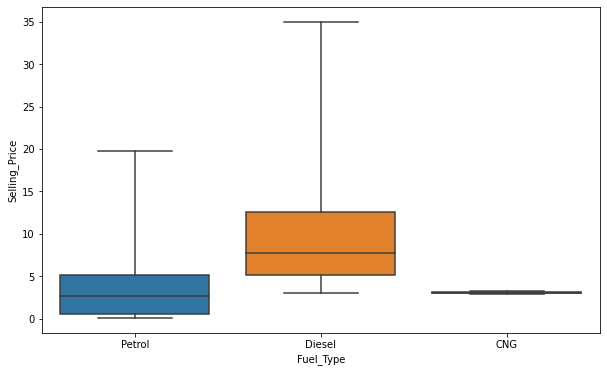

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=df, whis=5)
plt.show()

In [ ]:
df = pd.get_dummies(df)

In [19]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,...,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Year,2014.00,2013.00,2017.00,2011.00,2014.00,2018.00,2015.00,2015.00,2016.00,2015.00,2017.00,2015.00,2015.00,2015.00,2009.00,2016.00,2015.00,2016.00,2015.00,2010.00,2016.00,2017.00,2011.00,2014.00,2013.00,2011.00,2013.00,2017.00,2010.00,2015.00,2012.00,2011.00,2014.00,2014.00,2014.00,2011.00,2015.00,2003.00,2016.00,2003.00,2016.00,2014.00,2008.00,2014.00,2012.00,2014.00,2013.00,2006.00,2015.00,2017.00,...,2013.0,2015.00,2014.0,2013.00,2012.00,2016.00,2015.0,2015.0,2014.0,2016.00,2016.00,2015.0,2016.0,2015.0,2017.0,2014.00,2016.00,2017.0,2015.0,2011.0,2009.0,2015.0,2010.00,2014.0,2016.0,2015.00,2015.0,2016.0,2014.00,2015.00,2006.0,2014.00,2016.00,2013.0,2016.0,2016.00,2015.00,2015.0,2016.00,2014.0,2015.0,2016.0,2010.00,2014.00,2015.00,2016.0,2015.0,2009.00,2017.0,2016.0
Selling_Price,3.35,4.75,7.25,2.85,4.60,9.25,6.75,6.50,8.75,7.45,2.85,6.85,7.50,6.10,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.90,4.40,2.50,2.90,3.00,4.15,6.00,1.95,7.45,3.10,2.35,4.95,6.00,5.50,2.95,4.65,0.35,3.00,2.25,5.85,2.55,1.95,5.50,1.25,7.50,2.65,1.05,5.80,7.75,...,5.0,5.40,7.2,5.25,3.00,10.25,8.5,8.4,3.9,9.15,5.50,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.60,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.20,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.90,5.35,13.60,13.6,13.6,7.0,13.60,5.97,5.8,7.7,7.0,8.7,7.00,9.40,5.8,10.0,10.0,10.0,10.0,7.50,6.8,13.6,13.60,13.6,8.4,13.60,5.90,7.6,14.00,11.80,5.9,8.5,7.90,7.50,13.6,13.60,6.4,6.1,8.4,9.90,6.80,13.09,11.6,5.9,11.00,12.5,5.9
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00,2071.00,18796.00,33429.00,20273.00,42367.00,2135.00,51000.00,15000.00,26000.00,77427.00,43000.00,41678.00,43000.00,35500.00,41442.00,25000.00,2400.00,50000.00,45280.00,56879.00,20000.00,55138.00,16200.00,44542.00,45000.00,51439.00,54200.00,39000.00,45000.00,45000.00,49998.00,48767.00,127000.00,10079.00,62000.00,24524.00,46706.00,58000.00,45780.00,50000.00,15000.00,64532.00,65000.00,25870.00,37000.00,...,56701.0,31427.00,48000.0,54242.00,53675.00,49562.00,40324.0,25000.0,36054.0,29223.00,5600.00,40023.0,16002.0,40026.0,21200.0,35000.00,19434.00,19000.0,18828.0,69341.0,69562.0,27600.0,61203.00,16500.0,30753.0,24800.00,21780.0,4000.0,40126.00,14465.00,50456.0,63000.00,9010.00,9800.0,15059.0,28569.00,44000.00,34000.0,10980.00,19000.0,31427.0,12000.0,38000.00,33019.00,60076.00,33988.0,60000.0,87934.00,9000.0,5464.0
Owner,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fuel_Type_Petrol,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,

### Features and target variable

In [21]:
df.drop("Present_Price", axis=1,inplace=True)
df

,Year,Selling_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,Car_Name_Honda CB twister,Car_Name_Honda CBR 150,Car_Name_Honda Dream Yuga,Car_Name_Honda Karizma,Car_Name_Hyosung GT250R,Car_Name_KTM 390 Duke,Car_Name_KTM RC200,Car_Name_KTM RC390,Car_Name_Mahindra Mojo XT300,Car_Name_Royal Enfield Bullet 350,...,Car_Name_TVS Wego,Car_Name_UM Renegade Mojave,Car_Name_Yamaha FZ v 2.0,Car_Name_Yamaha FZ 16,Car_Name_Yamaha FZ S,Car_Name_Yamaha FZ S V 2.0,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,33988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [88]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

##Scaling the Data


scaling : Fitting our data to the same ranges.
Whether a feature is important or not in ML is expressed with coefficients. The ranges of my features can have different range values for each. If we don't do a scale, features in a large range are weighted more (valid for distance-based models) and our model will return incorrect results. We use scale to prevent this. It also accelerates the work of Gradient descent-based models such as linear, logistic regression.

There is no disadvantage of applying scale to data. data scale If you are confused about whether to apply it or not, you can apply scale directly.

Data leakage: Leakage of information about the data in the test set to the data in the train set
To prevent leakage, only fit operation is applied to X_train. On the other hand, only transform operation is applied to X_test. no fit operation is applied to all data.

Target is never scaled.

##with standard scaler

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler =  MinMaxScaler()

In [189]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.86666667, 0.08508509, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.05105105, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.73333333, 0.08308308, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.6       , 0.11111111, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.09309309, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.8       , 0.1011011 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [190]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.53333333, 0.05905906, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.73333333, 0.0950951 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.02902903, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.8       , 0.07007007, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.10510511, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.10759159, 0.        , ..., 0.        , 0.        ,
        1.        ]])

checking std = 1 and mean = 0
this gives us the z-scores. so it's also called z-score

These values show where in the normal distribution they correspond to the z score.

In [67]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
mean,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176
mean,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


##  Model Building (Linear Regression)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print("Lrcoeff: ",lr.coef_)

##Predicting Test Data

In [71]:
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [72]:
print("Liner Regression MSE: ",mean_squared_error(y_test,y_pred))

Liner Regression MSE:  1.1639379750048671e+27


##Model Evaluation

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [74]:
pd.options.display.float_format = '{:.3f}'.format

In [75]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.931,-113679607902021972970700800.000
mae,0.863,8716852474448.061
mse,2.119,1163937975004867122295734272.000
rmse,1.456,34116535213952.590


In [ ]:
print('Coefficients: \n', lr.coef_)

## Residuals
Plotting a histogram of the residuals and  to make sure it looks normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


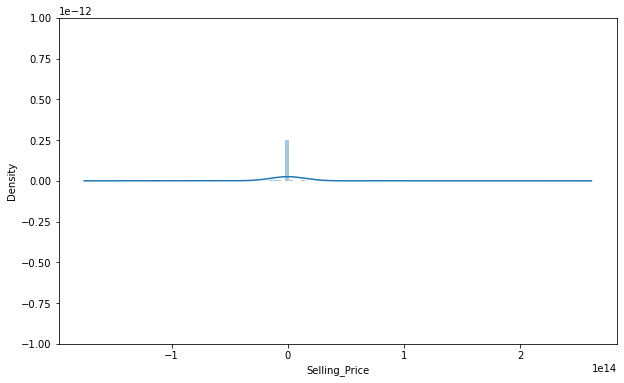

In [81]:
sns.distplot((y_test-y_pred),bins=100);

## Let's see if we can interpret the coefficients at all to get an idea

In [82]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Year,12.912
Kms_Driven,-0.183
Owner,1.798
Car_Name_800,2568180757489.813
Car_Name_Activa 3g,2568180757479.073
...,...
Fuel_Type_Petrol,33645209641524.285
Seller_Type_Dealer,-9645261656686.758
Seller_Type_Individual,-9645261656689.215
Transmission_Automatic,1045096317503.195


##Cross Validate
We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

In [179]:
from sklearn.model_selection import cross_validate, cross_val_score

In [180]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [181]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.015,0.002,-170006794556037197956382720.000,-18838228103872.109,-4390434838673005568686292992.000,-66260356463522.031
2,0.005,0.002,-126883777938932046864842752.000,-25454798534479.422,-5143631407671636384370655232.000,-71719114660400.234
3,0.005,0.002,-561939316901812648280064.000,-1236042010776.107,-13184680349637942427254784.000,-3631071515357.132
4,0.005,0.002,-14793004887151992635392000.000,-10895736336315.959,-464550883439192040703787008.000,-21553442496250.848
5,0.006,0.002,-54798300423079300767416320.000,-13855307861839.219,-1488344770888255344356622336.000,-38579071669601.578


In [45]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                            -1.134962e+27
test_neg_mean_absolute_error       -6.051847e+13
test_neg_mean_squared_error        -3.743700e+28
test_neg_root_mean_squared_error   -1.431053e+14
dtype: float64

In [46]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.929822,-2.286648e+26
mae,0.968765,1.683825e+13
mse,2.269610,2.268991e+27
rmse,1.506522,4.763392e+13


# Regularization

# Ridge

###Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge= Ridge(alpha=1, random_state=42, max_iter= 200000)

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
alphas= np.logspace(-4,-0.5,30)

In [ ]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])

In [99]:
tuned_parameters= {'alpha':alphas}
n_folds=5

In [100]:
clf=GridSearchCV(estimator=ridge, param_grid=tuned_parameters, cv=n_folds, scoring="neg_mean_squared_error", refit=True)


In [101]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=1, max_iter=200000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             scoring='neg_mean_squared_error')

In [102]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

In [103]:
print("Ridge Coeff: ", clf.best_estimator_)

Ridge Coeff:  Ridge(alpha=0.31622776601683794, max_iter=200000, random_state=42)


In [104]:
ridge=clf.best_estimator_
print("Ridge best Estimator: ", ridge)

Ridge best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=200000, random_state=42)


In [105]:
y_pred=clf.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)

In [ ]:
#y_pred = ridge_model.predict(X_test_scaled)
#y_train_pred = ridge_model.predict(X_train_scaled)

In [106]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.931,0.625
mae,0.863,1.462
mse,2.119,3.839
rmse,1.456,1.959


In [107]:
pd.options.display.float_format = '{:.3f}'.format

In [108]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.931,-113679607902021972970700800.000,0.931,0.625
mae,0.863,8716852474448.061,0.863,1.462
mse,2.119,1163937975004867122295734272.000,2.119,3.839
rmse,1.456,34116535213952.590,1.456,1.959


##with best parameters

In [110]:
from sklearn.linear_model import Ridge

In [111]:
alpha_best=0.31622776601683794

In [112]:
ridge = Ridge( alpha=alpha_best, random_state=42,max_iter=200000)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.31622776601683794, max_iter=200000, random_state=42)

In [113]:
y_pred = ridge.predict(X_test_scaled)
y_train_pred = ridge.predict(X_train_scaled)

In [114]:
rs_best = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs_best

,ridge_train,ridge_test
R2,0.914,0.625
mae,0.984,1.462
mse,2.648,3.839
rmse,1.627,1.959


In [115]:
pd.concat([ls, rs, rs_best], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_train,ridge_test
R2,0.931,-113679607902021972970700800.000,0.931,0.625,0.914,0.625
mae,0.863,8716852474448.061,0.863,1.462,0.984,1.462
mse,2.119,1163937975004867122295734272.000,2.119,3.839,2.648,3.839
rmse,1.456,34116535213952.590,1.456,1.959,1.627,1.959


# Lasso

In [116]:
from sklearn.linear_model import Lasso, LassoCV

In [123]:
lasso_model = Lasso( alpha=1, random_state=42,max_iter=200000)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, max_iter=200000, random_state=42)

In [124]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [125]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.225,0.272
mae,3.209,2.235
mse,23.919,7.452
rmse,4.891,2.730


###gridsearch

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
alphas= np.logspace(-4,-0.5,30)

In [ ]:
alphas

In [129]:
tuned_parameters= {'alpha':alphas}
n_folds=5

In [130]:
clf=GridSearchCV(estimator=lasso_model, param_grid=tuned_parameters, cv=n_folds, scoring="neg_mean_squared_error", refit=True)


In [131]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=1, max_iter=200000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             scoring='neg_mean_squared_error')

In [132]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]

In [133]:
print("Lasso Coeff: ", clf.best_estimator_)

Lasso Coeff:  Lasso(alpha=0.014873521072935119, max_iter=200000, random_state=42)


In [134]:
lasso_model=clf.best_estimator_
print("  best Estimator: ", lasso_model)

  best Estimator:  Lasso(alpha=0.014873521072935119, max_iter=200000, random_state=42)


In [135]:
y_pred=clf.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)

In [136]:
#y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = clf.predict(X_train_scaled)

In [137]:
pd.options.display.float_format = '{:.3f}'.format

In [138]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_model")
lss

,lasso_model_train,lasso_model_test
R2,0.891,0.682
mae,1.209,1.383
mse,3.371,3.252
rmse,1.836,1.803


with best parameters

In [139]:
from sklearn.linear_model import Lasso, LassoCV

In [140]:
alpha_best=0.014873521072935119

In [141]:
lasso_model = Lasso( alpha=alpha_best, random_state=42, max_iter=200000)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.014873521072935119, max_iter=200000, random_state=42)

In [142]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [143]:
ls_best = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_model")
ls_best

,lasso_model_train,lasso_model_test
R2,0.891,0.682
mae,1.209,1.383
mse,3.371,3.252
rmse,1.836,1.803


In [145]:
pd.concat([ls,rs,rs_best,lss, ls_best], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_train,ridge_test,lasso_model_train,lasso_model_test,lasso_model_train,lasso_model_test
R2,0.931,-113679607902021972970700800.000,0.931,0.625,0.914,0.625,0.891,0.682,0.891,0.682
mae,0.863,8716852474448.061,0.863,1.462,0.984,1.462,1.209,1.383,1.209,1.383
mse,2.119,1163937975004867122295734272.000,2.119,3.839,2.648,3.839,3.371,3.252,3.371,3.252
rmse,1.456,34116535213952.590,1.456,1.959,1.627,1.959,1.836,1.803,1.836,1.803


# Elastic-Net 

In [153]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [154]:
elastic_model = ElasticNet(alpha=1, random_state=42, max_iter=200000)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, max_iter=200000, random_state=42)

In [155]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [156]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.289,0.320
mae,3.061,2.167
mse,21.952,6.965
rmse,4.685,2.639


In [ ]:
scores_last=pd.concat([ls, rs, lss, ls_best, es], axis = 1)
scores_last 

,linear_train,linear_test,ridge_train,ridge_test,lasso_model_train,lasso_model_test,elastic_train,elastic_test
R2,0.892,-623329392610778496.000,0.892,0.885,0.892,0.885,0.620,0.617
mae,1690.212,83332825073.452,1690.212,1727.810,1691.033,1727.199,3290.742,3254.076
mse,5950529.740,33159316357677366026174464.000,5950529.740,6138715.920,5955021.443,6121548.412,20923130.559,20389306.162
rmse,2439.371,5758412659551.013,2439.371,2477.643,2440.291,2474.176,4574.181,4515.452


##Grid Search

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
elastic_model = ElasticNet(max_iter=200000, random_state=42)

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
alphas= np.logspace(-4,-0.5,30)

In [161]:
tuned_parameters= {'alpha':alphas}
n_folds=5

In [162]:
clf=GridSearchCV(estimator=elastic_model, param_grid=tuned_parameters, cv=n_folds, scoring="neg_root_mean_squared_error", verbose =2, refit=True)


In [163]:
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00013203517797162948; total time=   0.0s
[CV] END .......................alpha=0.00013203517797162948; total time=   0.0s
[CV] END .......................alpha=0.00013203517797162948; total time=   0.0s
[CV] END .......................alpha=0.00013203517797162948; total time=   0.0s
[CV] END .......................alpha=0.00013203517797162948; total time=   0.0s
[CV] END .......................alpha=0.00017433288221999874; total time=   0.0s
[CV] END .......................alpha=0.0001743

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=200000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [164]:
scores=clf.cv_results_["mean_test_score"]
scores_std=clf.cv_results_["std_test_score"]


In [165]:
print("Elastic_net Coeff: ", clf.best_estimator_)

Elastic_net Coeff:  ElasticNet(alpha=0.004893900918477494, max_iter=200000, random_state=42)


In [166]:
elastic_model=clf.best_estimator_
print("  best Estimator: ", elastic_model)

  best Estimator:  ElasticNet(alpha=0.004893900918477494, max_iter=200000, random_state=42)


In [167]:
y_pred=clf.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)

In [168]:
y_train_pred = clf.predict(X_train_scaled)

In [169]:
pd.options.display.float_format = '{:.3f}'.format

In [170]:
clf.best_params_

{'alpha': 0.004893900918477494}

In [ ]:
pd.DataFrame(clf.cv_results_)

In [171]:
clf.best_index_

14

In [172]:
clf.best_score_

-2.7999065017251126

In [173]:
escv = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
escv

,elastic_train,elastic_test
R2,0.890,0.628
mae,1.130,1.501
mse,3.385,3.806
rmse,1.840,1.951


with best parameters

In [174]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [175]:
elastic_model = ElasticNet(alpha=0.00023018073130224678, max_iter=200000, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.00023018073130224678, max_iter=200000, random_state=42)

In [176]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [177]:
es_best = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es_best

,elastic_train,elastic_test
R2,0.931,0.581
mae,0.875,1.457
mse,2.133,4.288
rmse,1.460,2.071


In [183]:
scores=pd.concat([ls, rs, rs_best, lss, ls_best,  es, es_best], axis = 1)
scores

,linear_train,linear_test,ridge_train,ridge_test,ridge_train,ridge_test,lasso_model_train,lasso_model_test,lasso_model_train,lasso_model_test,elastic_train,elastic_test,elastic_train,elastic_test
R2,0.931,-113679607902021972970700800.000,0.931,0.625,0.914,0.625,0.891,0.682,0.891,0.682,0.289,0.320,0.931,0.581
mae,0.863,8716852474448.061,0.863,1.462,0.984,1.462,1.209,1.383,1.209,1.383,3.061,2.167,0.875,1.457
mse,2.119,1163937975004867122295734272.000,2.119,3.839,2.648,3.839,3.371,3.252,3.371,3.252,21.952,6.965,2.133,4.288
rmse,1.456,34116535213952.590,1.456,1.959,1.627,1.959,1.836,1.803,1.836,1.803,4.685,2.639,1.460,2.071


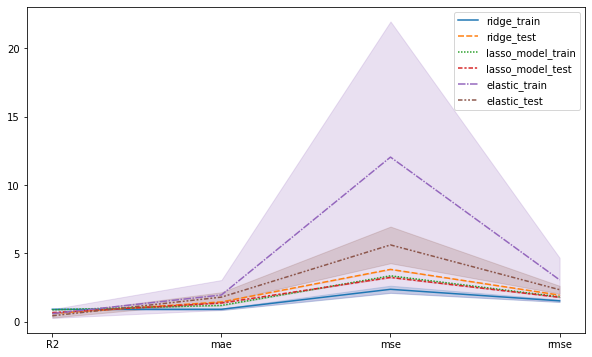

In [184]:
sns.lineplot(data = scores.iloc[:,2:]);

##Final Model

In [186]:
final_model = Ridge( alpha=0.31622776601683794, random_state=42,max_iter=200000)

##Feature importances with Ridge

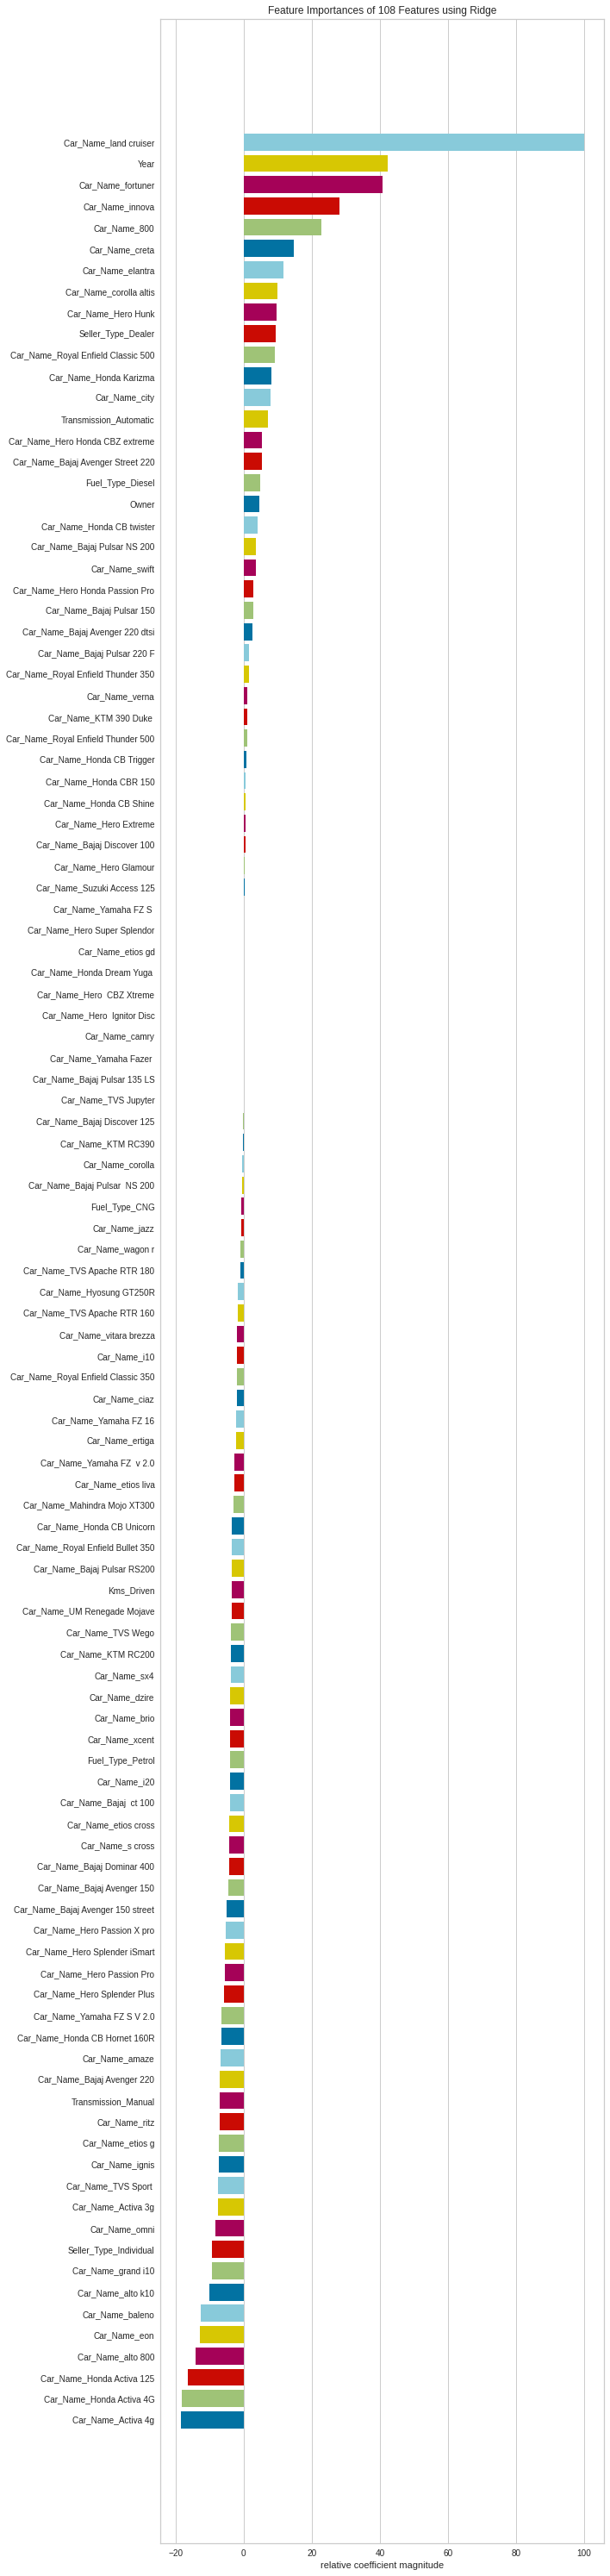

In [193]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

##Feature importances with Lasso

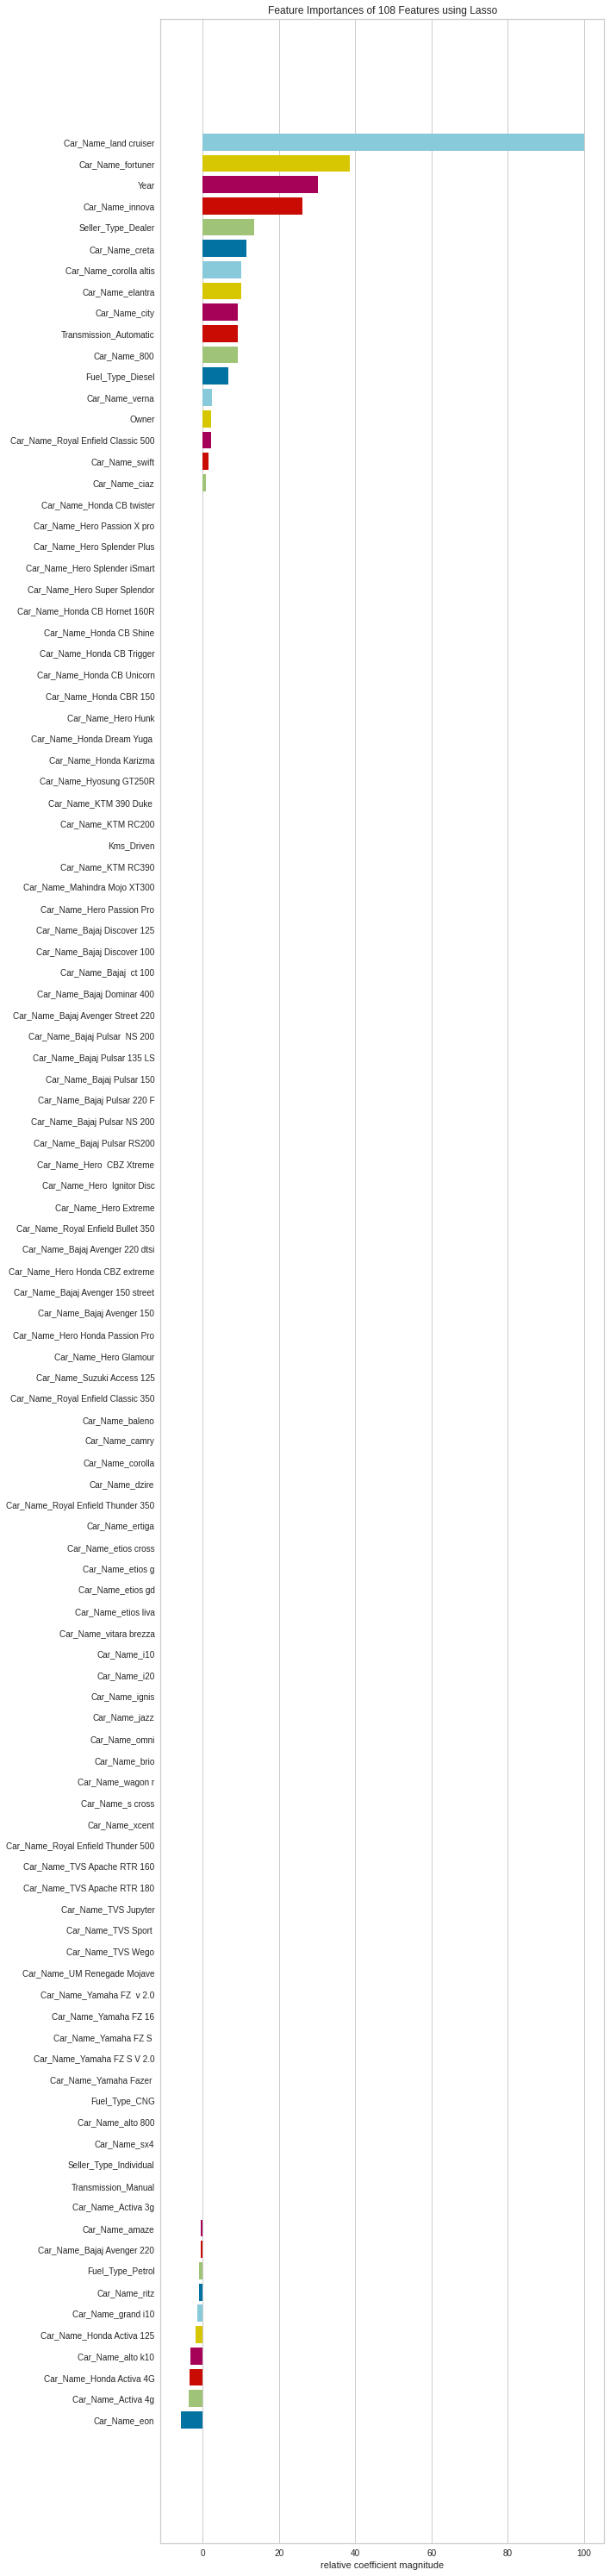

In [192]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()